<a href="https://colab.research.google.com/github/tarunv7/AIML/blob/main/2_Covid_19_Data_Analysis_and_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    ###data visualization
import plotly.express as px    ###plotting the data on the world map

##import warnings
##import itertools
##import numpy as np
##warnings.filterwarnings("ignore")
##plt.style.use('fivethirtyeight')
##import statsmodels.api as sm
##import matplotlib

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsarosh/Sarosh-Dastoor/main/covid_19_clean_complete_till_23_June.csv')

Data base comprising of data from 22-1-2020 to 18-6-2020


In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [4]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38884,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,NaN,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,NaN,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,NaN,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe
38888,NaN,Lesotho,-29.609988,28.233608,2020-06-18,4,0,2,2,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11622 non-null  object 
 1   Country/Region  38889 non-null  object 
 2   Lat             38889 non-null  float64
 3   Long            38889 non-null  float64
 4   Date            38889 non-null  object 
 5   Confirmed       38889 non-null  int64  
 6   Deaths          38889 non-null  int64  
 7   Recovered       38889 non-null  int64  
 8   Active          38889 non-null  int64  
 9   WHO Region      38889 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [ ]:
## convert date from object Dtype to date-time
df = pd.read_csv('https://raw.githubusercontent.com/dsarosh/Sarosh-Dastoor/main/covid_19_clean_complete_till_23_June.csv'
,parse_dates=['Date'])    ###convert the date column into date-time column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  11622 non-null  object        
 1   Country/Region  38889 non-null  object        
 2   Lat             38889 non-null  float64       
 3   Long            38889 non-null  float64       
 4   Date            38889 non-null  datetime64[ns]
 5   Confirmed       38889 non-null  int64         
 6   Deaths          38889 non-null  int64         
 7   Recovered       38889 non-null  int64         
 8   Active          38889 non-null  int64         
 9   WHO Region      38889 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.0+ MB


In [ ]:
##remove state column which is unnecessary
df.drop(["Province/State"],axis=1,inplace=True)  ###removes the PRovince/State column
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
df.rename(columns={"Country/Region":"country"},inplace=True) ##rename Cuntry/region as Country   ###renaming Country/region as country using dictionary
df.head()

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
###calculate no of active cases and add it as a column in the table
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']   ###It also adds columns to the dataset

In [ ]:
df.tail() ###initial cases are all zero so lets check bottom data

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38884,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe
38888,Lesotho,-29.609988,28.233608,2020-06-18,4,0,2,2,Africa


In [ ]:
df.tail(20)

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38869,Canada,64.825500,-124.845700,2020-06-18,5,0,0,5,Americas
38870,Canada,64.282300,-135.000000,2020-06-18,11,0,0,11,Americas
38871,Kosovo,42.602636,20.902977,2020-06-18,1486,33,953,500,Europe
38872,Burma,21.916200,95.956000,2020-06-18,286,6,187,93,South-East Asia
38873,United Kingdom,18.220600,-63.068600,2020-06-18,3,0,3,0,Europe
38874,United Kingdom,18.420700,-64.640000,2020-06-18,8,1,7,0,Europe
38875,United Kingdom,21.694000,-71.797900,2020-06-18,12,1,11,0,Europe
38876,Botswana,-22.328500,24.684900,2020-06-18,79,1,25,53,Africa
38877,Burundi,-3.373100,29.918900,2020-06-18,104,1,75,28,Africa
38878,Sierra Leone,8.460555,-11.779889,2020-06-18,1272,51,710,511,Africa


In [ ]:
#### Top Countries

In [ ]:
###To find the no of cases currently
top = df[df['Date'] == df['Date'].max()]   ### to display the data of the last date

In [ ]:
df['Date'].max() ###finding the maximum date

Timestamp('2020-06-18 00:00:00')

In [ ]:
top.head() ##data of 23 April 2020 in data, latest

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38628,Afghanistan,33.0000,65.0000,2020-06-18,27532,546,7660,19326,Eastern Mediterranean
38629,Albania,41.1533,20.1683,2020-06-18,1788,39,1086,663,Europe
38630,Algeria,28.0339,1.6596,2020-06-18,11385,811,8078,2496,Africa
38631,Andorra,42.5063,1.5218,2020-06-18,855,52,792,11,Europe
38632,Angola,-11.2027,17.8739,2020-06-18,166,8,64,94,Africa


In [ ]:
##Grouping the data is groupby
world = top.groupby('country')['Confirmed','Deaths','Recovered','Active'].sum().reset_index() ##if same country is written twice then 'sum()' will add the active cases of that country
world.head()   ###Confirmed, deaths, recoved and active columns are required

<ipython-input-17-7e4d5029f88f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = top.groupby('country')['Confirmed','Deaths','Recovered','Active'].sum().reset_index() ##if same country is written twice then 'sum()' will add the active cases of that country


,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,27532,546,7660,19326
1,Albania,1788,39,1086,663
2,Algeria,11385,811,8078,2496
3,Andorra,855,52,792,11
4,Angola,166,8,64,94


In [ ]:
###Plotting active cases on the wrld map
figure = px.choropleth(world,locations='country',locationmode='country names',color='Active',
                       hover_name = 'country',range_color=[1,1000],color_continuous_scale='blues',  ###location mode will compare the name of actual countries with that in the data base.
                       title="Country With Active Case") ### 'Active indicates active cases', colour ranges from 1 to 1000; write random colourname, then in error it will give the name of colours
figure.show()

In [ ]:
### Plotting Confirmed Cases vs Date
total_confirmed = df.groupby('Date')['Date','Confirmed'].sum().reset_index() ###reset_index to remove index in the first column, first column will be date and second will be confirmed
total_confirmed.tail() ## total no of cases on the lastes date ie 18 June 2020

<ipython-input-19-d93a7c69f992>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-19-d93a7c69f992>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Date,Confirmed
144,2020-06-14,7911685
145,2020-06-15,8033720
146,2020-06-16,8173199
147,2020-06-17,8349209
148,2020-06-18,8488235


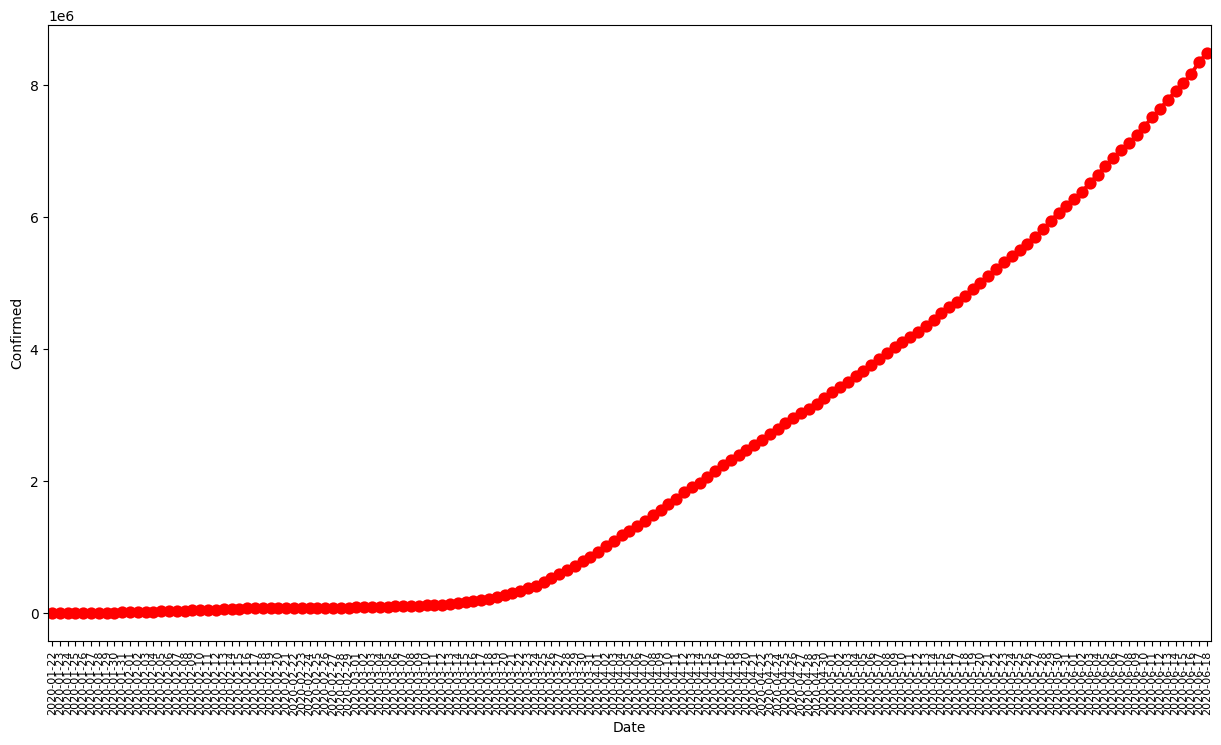

In [ ]:
##plotting the data using point plot
plt.figure(figsize=(15,8))    ###15 is width and 8 is height of the graph
plt.xticks(rotation=90,fontsize=8)   ###rotation of dates by 90 deg, if not used then dates will not be seen
sns.pointplot(x=total_confirmed['Date'].dt.date,y=total_confirmed['Confirmed'],color='red') ###dt.date only dates from datetime otherwise time will also be found along with date
plt.show()

In [ ]:
len(total_confirmed) ##we have data of 149 dates, so hard to plot on X axis

149

In [ ]:
### Plotting Confirmed Cases vs Date
total_confirmed = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
#total_confirmed.tail()
### Plotting Confirmed Cases vs Date
total_death = df.groupby('Date')['Date','Deaths'].sum().reset_index()
#total_death.tail()

<ipython-input-22-99bb84fdc930>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-22-99bb84fdc930>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-22-99bb84fdc930>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-22-99bb84fdc930>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



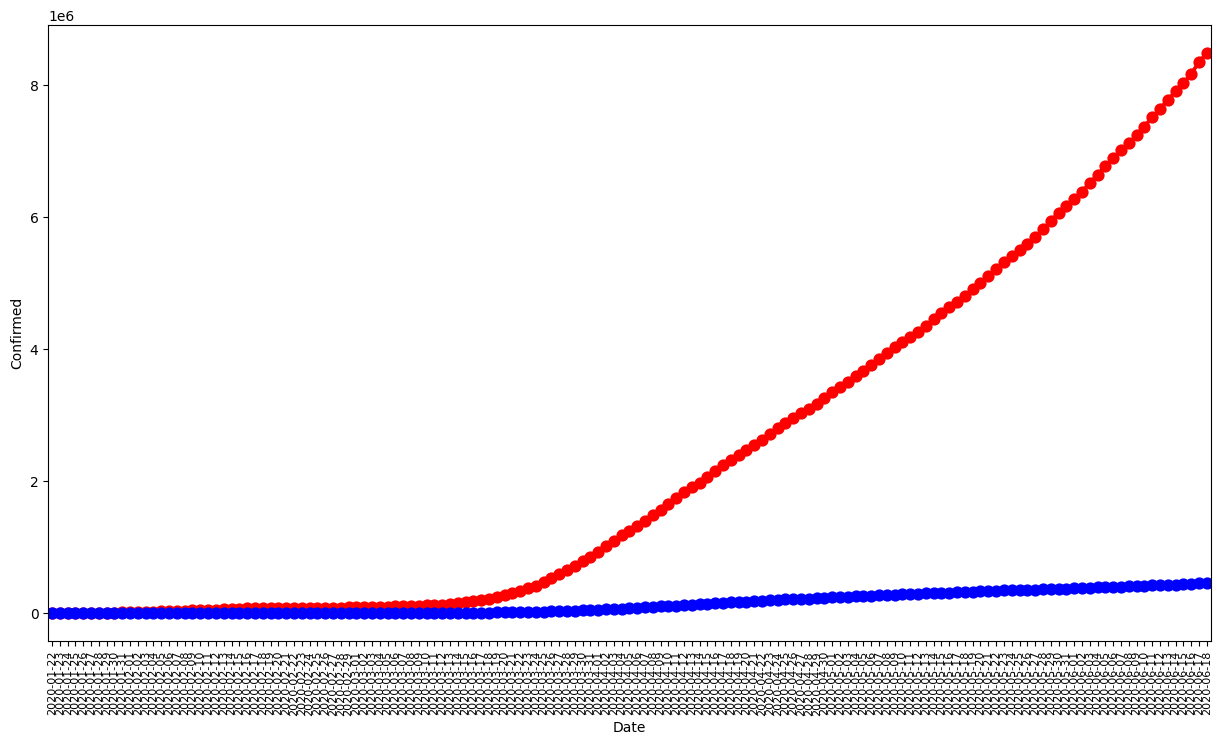

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(x=total_confirmed['Date'].dt.date,y=total_confirmed['Confirmed'],color='red')
sns.pointplot(x=total_death['Date'].dt.date,y=total_death['Deaths'],color='blue')
plt.show()

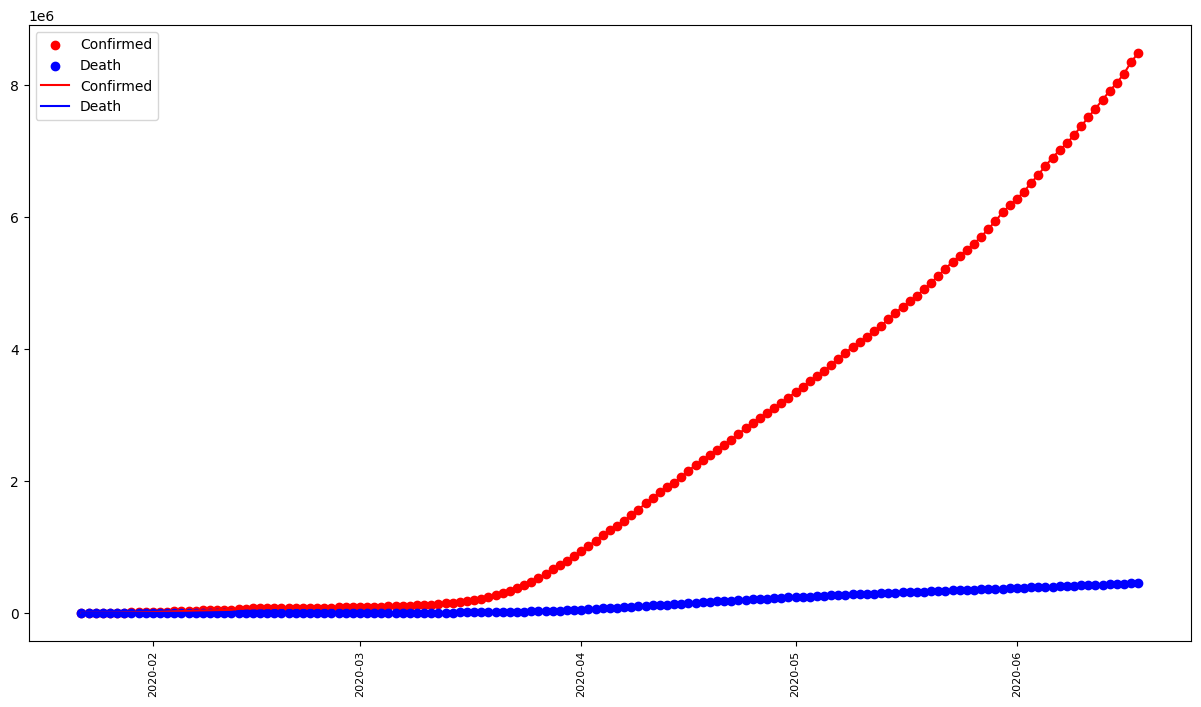

In [ ]:
## put the labels using scatter plot
plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=8)
plt.scatter(x=total_confirmed['Date'].dt.date,y=total_confirmed['Confirmed'],color='red',label="Confirmed")
plt.scatter(x=total_death['Date'].dt.date,y=total_death['Deaths'],color='blue',label="Death")
plt.plot(total_confirmed['Date'].dt.date,total_confirmed['Confirmed'],color='red',label="Confirmed")
plt.plot(total_death['Date'].dt.date,total_death['Deaths'],color='blue',label="Death")
plt.legend(loc=2)  ###loc is location of lelgend 2 = second quadrant it should be there.
plt.show()

In [ ]:
#### Top 20 Countries having Active Cases

In [ ]:
top.head()

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38628,Afghanistan,33.0000,65.0000,2020-06-18,27532,546,7660,19326,Eastern Mediterranean
38629,Albania,41.1533,20.1683,2020-06-18,1788,39,1086,663,Europe
38630,Algeria,28.0339,1.6596,2020-06-18,11385,811,8078,2496,Africa
38631,Andorra,42.5063,1.5218,2020-06-18,855,52,792,11,Europe
38632,Angola,-11.2027,17.8739,2020-06-18,166,8,64,94,Africa


In [ ]:
##sorting the values of top active cases in ascending order, for descending it should be ascending = False,head(20) will give 20 countries
top_actives = top.groupby('country')['Active'].sum().sort_values(ascending=False).reset_index().head(20)
top_actives

,country,Active
0,US,1473503
1,Brazil,395814
2,United Kingdom,258249
3,Russia,239262
4,India,163248
5,Peru,105737
6,Pakistan,100450
7,Canada,93504
8,France,91655
9,Spain,67756


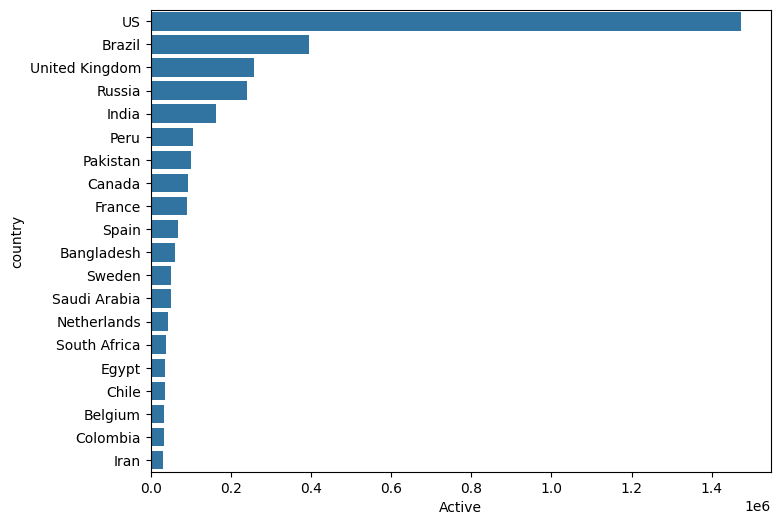

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=top_actives['Active'],y=top_actives['country'])
plt.show()

In [ ]:
#### Making Data Frames for different Countries

In [ ]:
df.head()

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
### China Data, filtering the data for China
china = df[df['country']=='China']
china = china.groupby('Date')['Recovered','Active','Deaths','Confirmed'].sum().reset_index()  ###groupby using date as all data of same date should be added to same date.
china.head()

<ipython-input-31-93cc77f88a66>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Deaths,Confirmed
0,2020-01-22,28,503,17,548
1,2020-01-23,30,595,18,643
2,2020-01-24,36,858,26,920
3,2020-01-25,39,1325,42,1406
4,2020-01-26,49,1970,56,2075


In [ ]:
### India Data
india = df[df['country']=='India']
india = india.groupby('Date')['Recovered','Active','Deaths','Confirmed'].sum().reset_index()
india.tail()

<ipython-input-32-3d55018a758b>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Deaths,Confirmed
144,2020-06-14,169798,153106,9520,332424
145,2020-06-15,180013,153178,9900,343091
146,2020-06-16,186935,155227,11903,354065
147,2020-06-17,194325,160384,12237,366946
148,2020-06-18,204711,163248,12573,380532


In [ ]:
### Italy Data
italy = df[df['country']=='Italy']
italy = italy.groupby('Date')['Recovered','Active','Deaths','Confirmed'].sum().reset_index()
italy.head()

<ipython-input-33-315a26693b49>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Deaths,Confirmed
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [ ]:
### US Data
us = df[df['country']=='US']
us = us.groupby('Date')['Recovered','Active','Deaths','Confirmed'].sum().reset_index()
us.tail()

<ipython-input-34-83d580b30a16>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Deaths,Confirmed
144,2020-06-14,561816,1416510,115732,2094058
145,2020-06-15,576334,1421565,116127,2114026
146,2020-06-16,583503,1437265,116963,2137731
147,2020-06-17,592191,1453382,117717,2163290
148,2020-06-18,599115,1473503,118434,2191052


In [ ]:
### Germany Data
germany = df[df['country']=='Germany']
germany = germany.groupby('Date')['Recovered','Active','Deaths','Confirmed'].sum().reset_index()
germany.head()

<ipython-input-35-80ba1794d59a>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Deaths,Confirmed
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


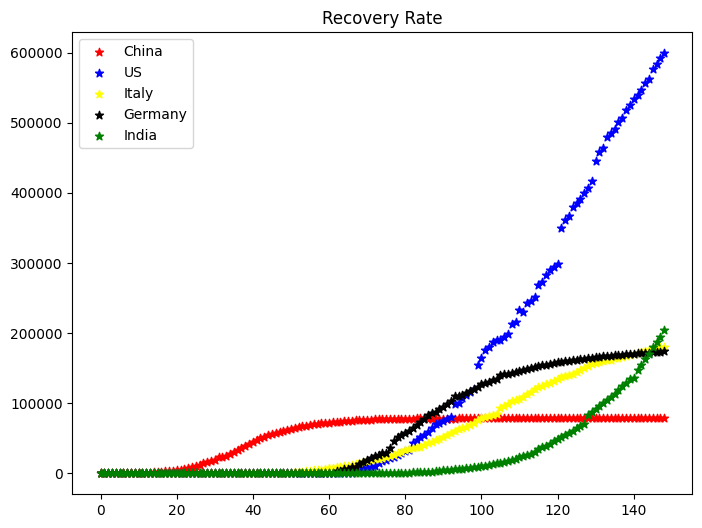

In [ ]:
###Plot graph for recovery
plt.figure(figsize=(8,6))
plt.title("Recovery Rate")
plt.scatter(china.index,china['Recovered'],color='red',label="China",marker='*')
plt.scatter(us.index,us['Recovered'],color='blue',label="US",marker='*')
plt.scatter(italy.index,italy['Recovered'],color='yellow',label="Italy",marker='*')
plt.scatter(germany.index,germany['Recovered'],color='black',label="Germany",marker='*')
plt.scatter(india.index,india['Recovered'],color='green',label="India",marker='*')
plt.legend(loc=2)
plt.show()

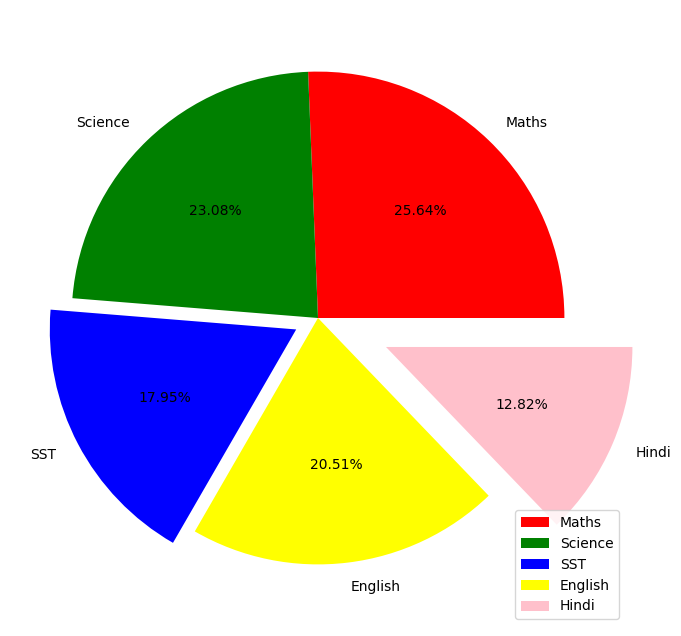

In [ ]:
#### Pie Chart
plt.figure(figsize=(12,8))
marks = [100,90,70,80,50]
subjects = ["Maths","Science","SST","English","Hindi"]
cols = ['red','green','blue','yellow','pink']
plt.pie(marks,labels=subjects,colors=cols,explode=(0,0,0.1,0,0.3),autopct="%1.2f%%") ###atopct1.2f = caclculate %in 2 decimal places
plt.legend(loc=4)
plt.show()

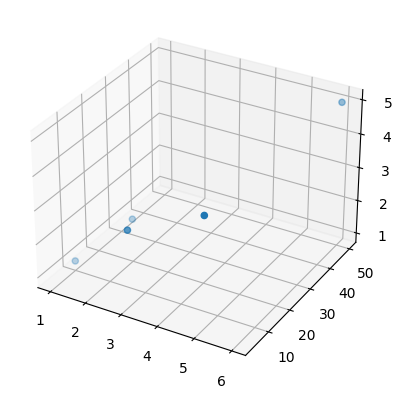

In [ ]:
from mpl_toolkits.mplot3d import Axes3D as a
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x= [1,2,3,5,6]
y =[10,20,3,4,50]
z =[1,2,3,4,5]
ax.scatter(x,y,z)
plt.show()

In [ ]:
from prophet import Prophet             ### fbprophet is the facebook libray for time series analysis, others are arima.

In [ ]:
### Forecasting for n upcoming days
confirmed = india.groupby('Date').sum()['Confirmed'].reset_index() ## sum will be applied on confirmed cases only
deaths = india.groupby('Date').sum()['Deaths'].reset_index()
recovered = india.groupby('Date').sum()['Recovered'].reset_index()
active = india.groupby('Date').sum()['Active'].reset_index()

In [ ]:
confirmed.columns = ['ds','y']   ###Rename the column of date with ds as dates and confirmed cases with y as it is required in prophet
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.tail()

,ds,y
144,2020-06-14,332424
145,2020-06-15,343091
146,2020-06-16,354065
147,2020-06-17,366946
148,2020-06-18,380532


In [ ]:
###Build the model -- run the algorithm
m = Prophet(interval_width=0.95) ### confidence level is width--- model will try to give accuracy of 95%
###Fit the model (train the model)
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)   ###make the data frame for the 30 days of future
future.tail(10)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp920l7_v9/jll8yf08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp920l7_v9/3d0b2wta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28842', 'data', 'file=/tmp/tmp920l7_v9/jll8yf08.json', 'init=/tmp/tmp920l7_v9/3d0b2wta.json', 'output', 'file=/tmp/tmp920l7_v9/prophet_modelfds0itdm/prophet_model-20240316105314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
169,2020-07-09
170,2020-07-10
171,2020-07-11
172,2020-07-12
173,2020-07-13
174,2020-07-14
175,2020-07-15
176,2020-07-16
177,2020-07-17
178,2020-07-18


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
174,2020-07-14,592135.302475,559707.367467,624837.166769
175,2020-07-15,601119.734327,566177.257905,635680.424745
176,2020-07-16,610229.052805,572487.727339,646892.160728
177,2020-07-17,618191.823753,578063.356822,656803.657920
178,2020-07-18,627255.941865,587300.901430,667073.088909


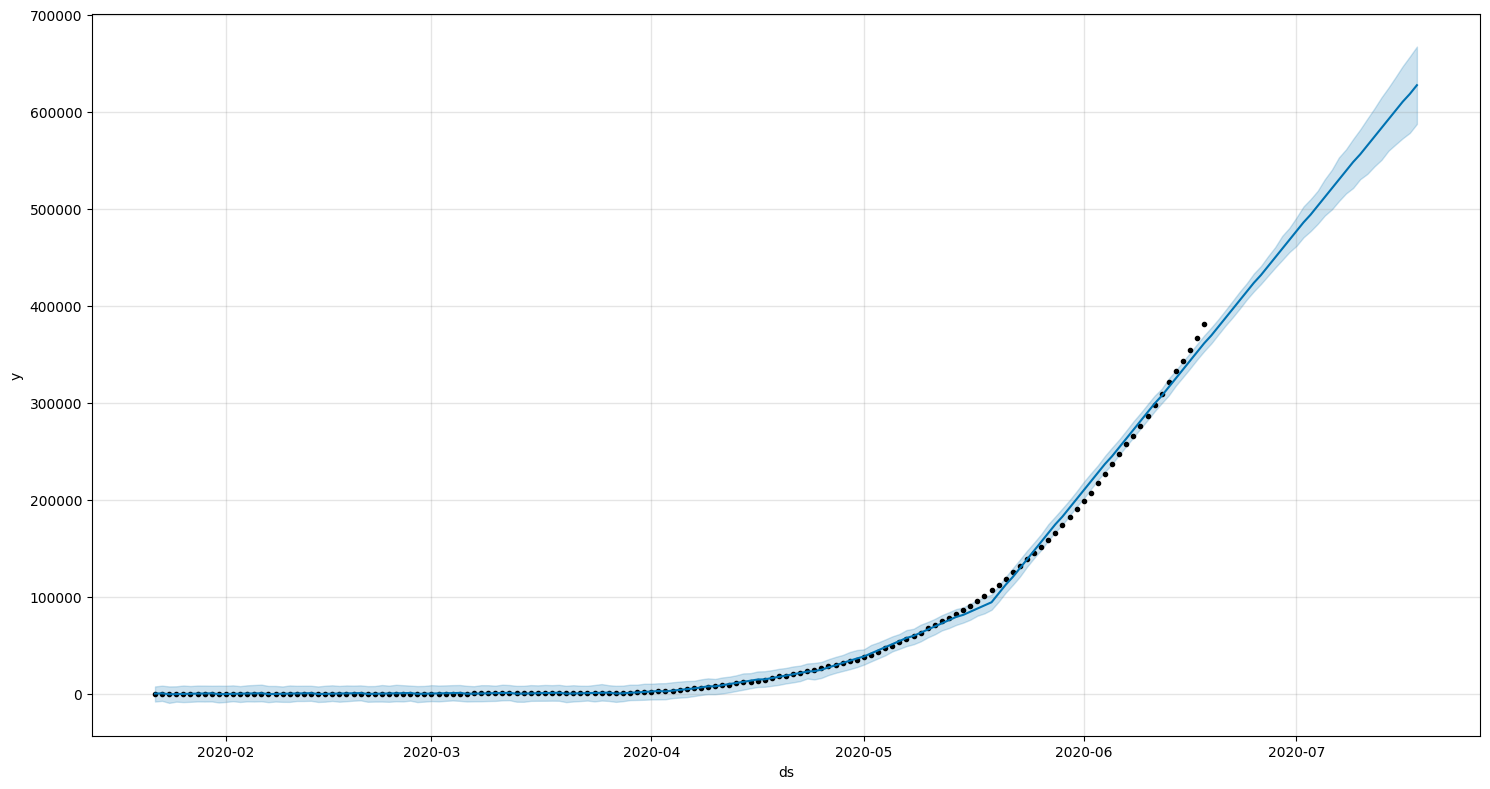

In [ ]:
 confirmed_forecast_plot = m.plot(forecast, figsize=(15,8) )  ###dot is the actual value

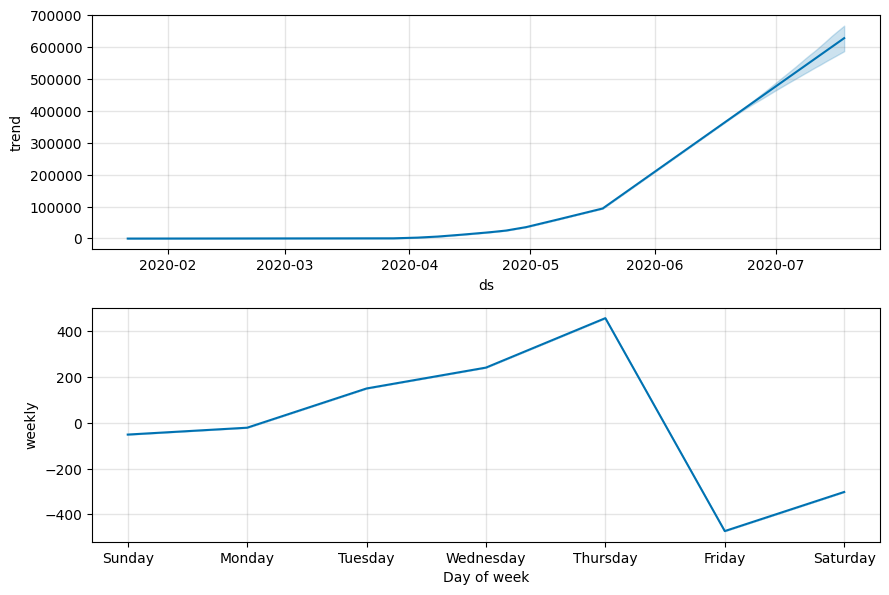

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

#Deaths

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp920l7_v9/25nmm72g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp920l7_v9/j4io0wwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45385', 'data', 'file=/tmp/tmp920l7_v9/25nmm72g.json', 'init=/tmp/tmp920l7_v9/j4io0wwt.json', 'output', 'file=/tmp/tmp920l7_v9/prophet_modelidxji21k/prophet_model-20240316105318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
151,2020-06-21
152,2020-06-22
153,2020-06-23
154,2020-06-24
155,2020-06-25


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2020-06-21,11231.069537,10556.599217,11900.372778
152,2020-06-22,11486.249360,10852.648417,12122.939242
153,2020-06-23,11822.019703,11084.560281,12482.160054
154,2020-06-24,12076.233026,11398.723102,12700.135038
155,2020-06-25,12334.484716,11698.484734,13057.022448


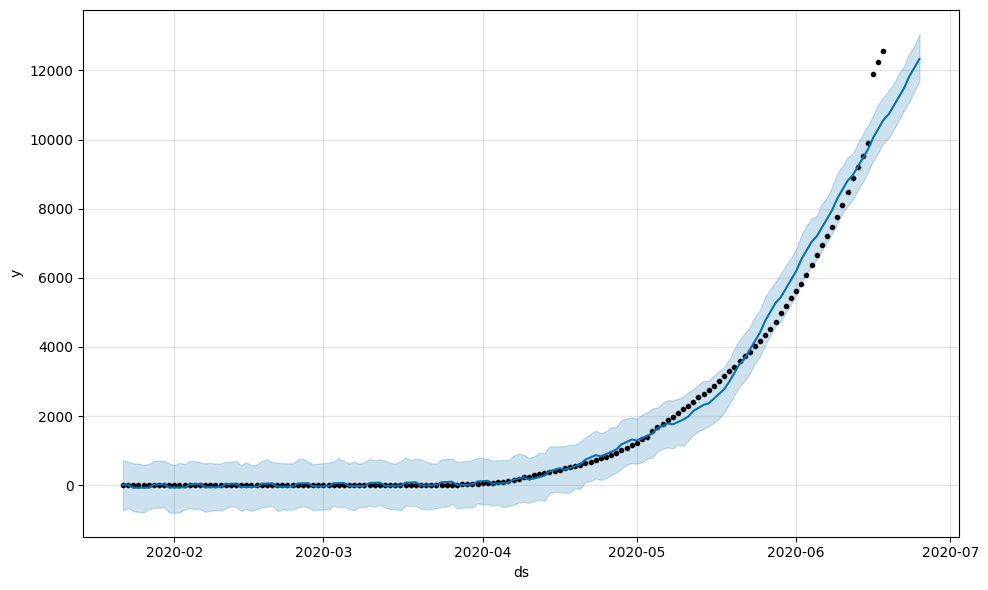

In [ ]:
deaths_forecast_plot = m.plot(forecast)

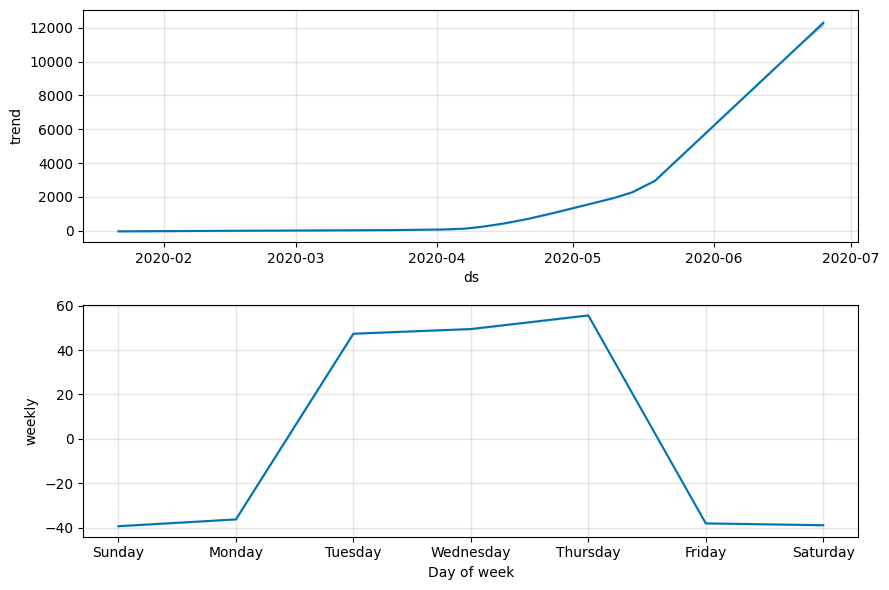

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

#Active

In [ ]:
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])

In [ ]:
active.tail()

,ds,y
144,2020-06-14,153106
145,2020-06-15,153178
146,2020-06-16,155227
147,2020-06-17,160384
148,2020-06-18,163248


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2020-06-21,11231.069537,10566.371480,11950.135790
152,2020-06-22,11486.249360,10783.253291,12187.903897
153,2020-06-23,11822.019703,11159.836275,12560.787413
154,2020-06-24,12076.233026,11381.675021,12725.303890
155,2020-06-25,12334.484716,11623.255254,13021.735095


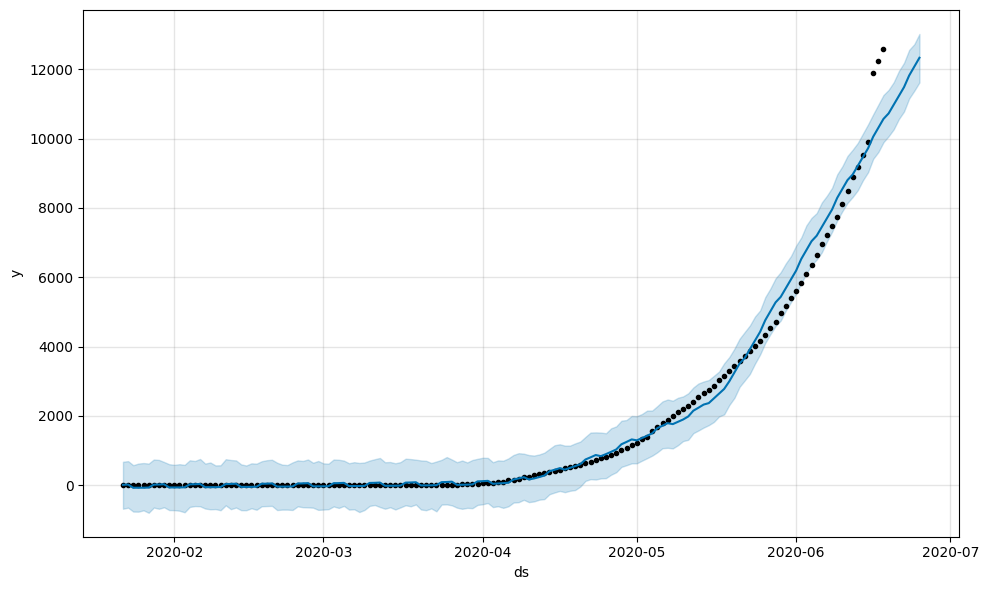

In [ ]:
active_forecast_plot = m.plot(forecast)

#Recovery

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
recovered.tail()

,ds,y
144,2020-06-14,169798
145,2020-06-15,180013
146,2020-06-16,186935
147,2020-06-17,194325
148,2020-06-18,204711


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp920l7_v9/j4g26w8d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp920l7_v9/a2trmdy0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67120', 'data', 'file=/tmp/tmp920l7_v9/j4g26w8d.json', 'init=/tmp/tmp920l7_v9/a2trmdy0.json', 'output', 'file=/tmp/tmp920l7_v9/prophet_modelsxmjhpix/prophet_model-20240316105323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
151,2020-06-21
152,2020-06-22
153,2020-06-23
154,2020-06-24
155,2020-06-25


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2020-06-21,200691.427998,194113.093110,207035.686161
152,2020-06-22,205882.288728,199037.884394,212797.690618
153,2020-06-23,211056.366004,204417.198619,217912.159009
154,2020-06-24,215799.642954,208191.459992,222514.993432
155,2020-06-25,221232.650979,213605.392716,228392.477078


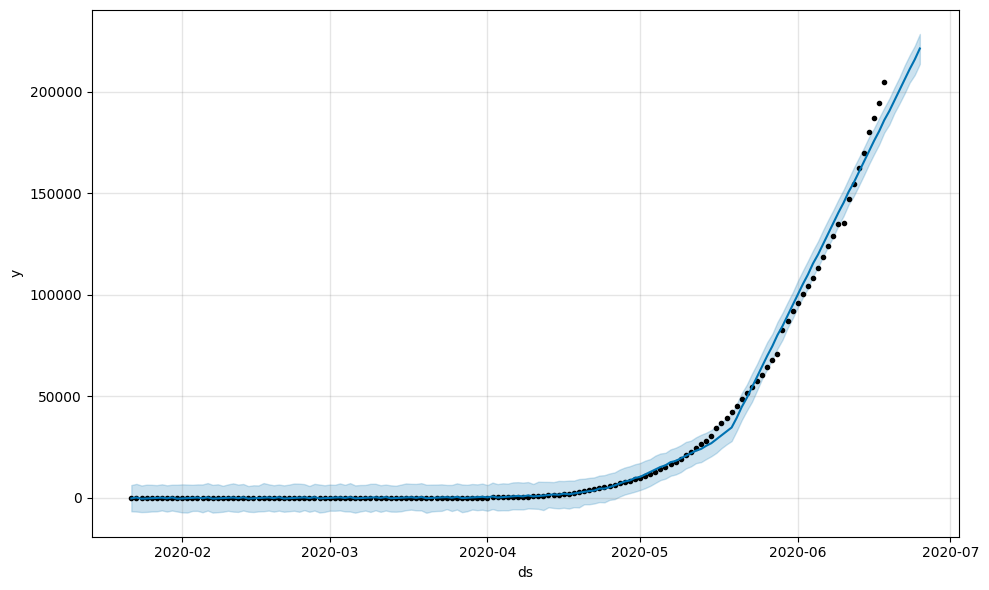

In [ ]:
recovered_forecast_plot = m.plot(forecast)